<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [12]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [57]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

#### Read the dataset in the csv file from the URL


In [14]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [15]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


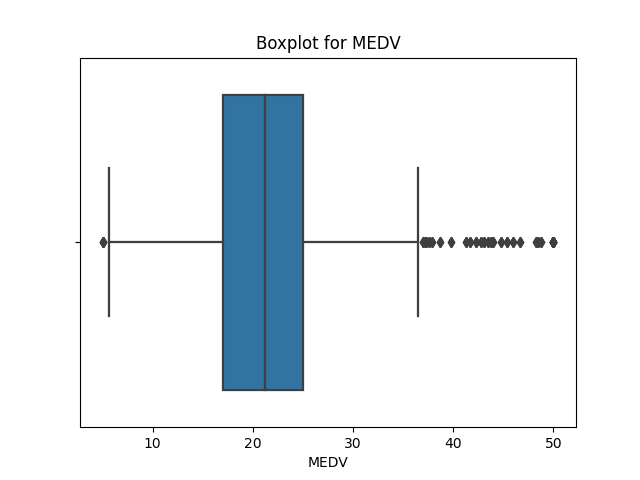

In [22]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

<ipython-input-34-02a290fd8d9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.CHAS,bins=10, kde=False)


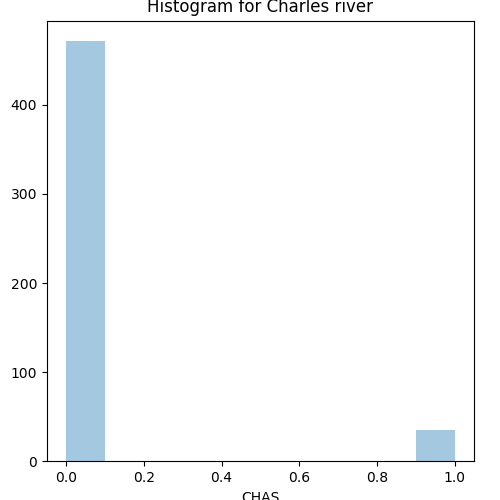

In [34]:
#Provide a  bar plot for the Charles river variable
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

In [37]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

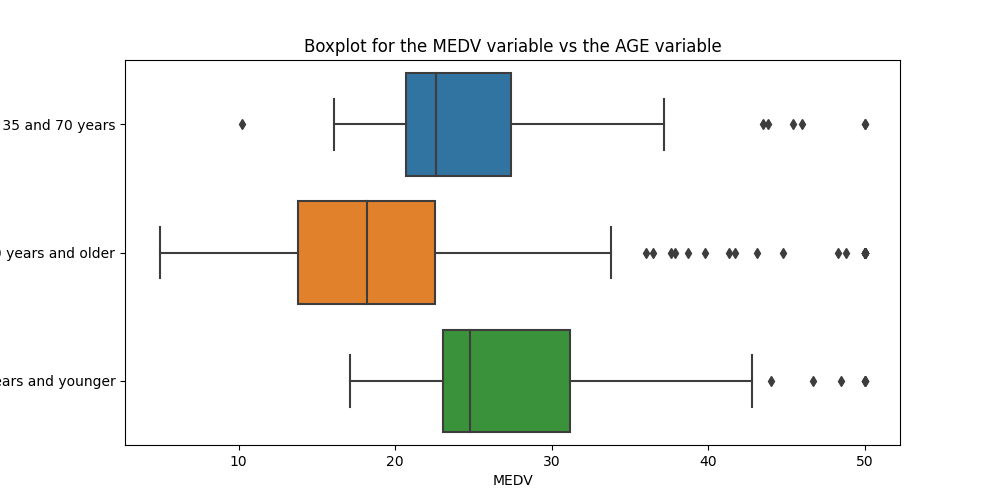

In [42]:
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

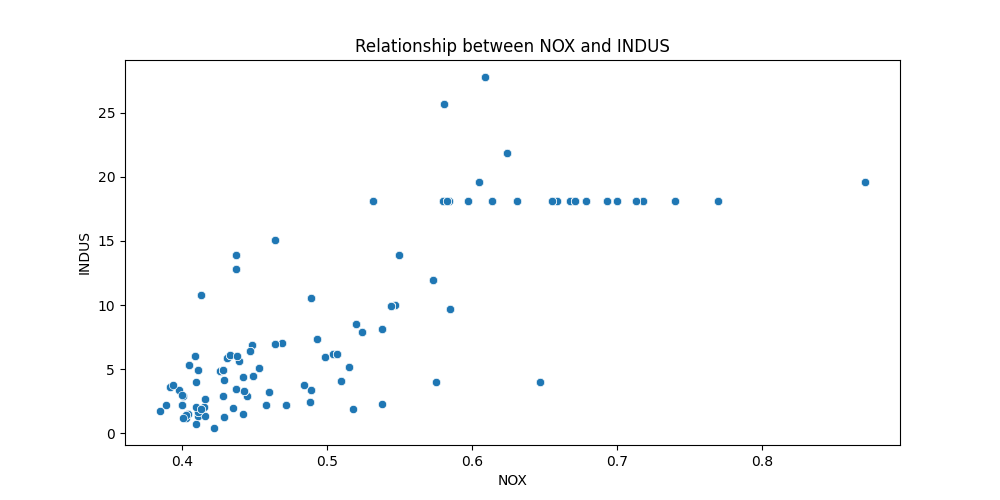

In [44]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
#What can you say about the relationship?

sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

There appears to be a linear relationship between the two factors until NOX is greater than 0.6.

<ipython-input-46-ab444df74679>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)


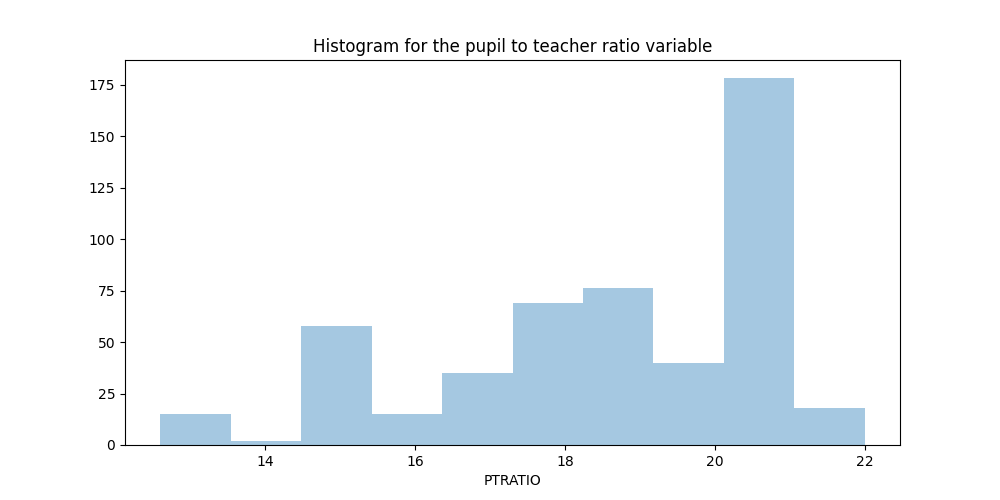

In [46]:
#Create a histogram for the pupil to teacher ratio variable
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()


1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
HO:Both average MEDV are the same
H1:Both average MEDV are the sam


In [48]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]

In [49]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

With a p-value greater than or equal to 0.05, we cannot reject the original hypothesis.


2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

HO:µ1=µ2=µ3 (the three population means are equal)
H1:At least one of the means differ


In [51]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

In [52]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


With a p-value greater than or equal to 0.05, we cannot reject the original hypothesis.


3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0:NOX is not correlated with INDUS
H1:NOX is correlated with INDUS


In [53]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209189, P-value=7.913361061211254e-98


Since the p-value is less than 0.05, we reject the original hypothesis and conclude that there is a relationship between nitrous oxide and non-retail commercial acres in each town.


4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0:weighted distances to five Boston employment centres are not related to median value
H1:weighted distances to five Boston employment centres are related to median value


In [55]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        22:25:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Pearson Coeffiecent value
np.sqrt(0.062)

0.24899799195977465

The correlation coefficient between the two variables was 0.25, which indicates a low level of correlation.